# Project Name: Biodiversity
 By Ajala
 
Project Goal: 
To identify patterns (if any) or themes to the species types that become endangered.

Project Objective: To clean up data, analyze and plot data as well as seek answers to the following questions:
-	conservation statuses of the species and investigate if there are any patterns or themes to the types of species that become endangered.
-	What distribution of conservation_status for animals?
-	Are certain types of species more likely to be endangered?
-	Are the differences between species and their conservation status significant?
-	Which species were spotted the most at each park?

Data Source from Code Academy: 
-	species_info.csv: contains data about different species and their conservation status
-	observations.csv: holds recorded sightings of different species at several national parks for the past 7 days.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#load species data 
species_info_df = pd.read_csv("species_info.csv")

#load observation data 
observations_df = pd.read_csv("observations.csv")


In [21]:
#display few rows of each dataframe to verify the data is loaded correctly

print("Species Info:")
print(species_info.head())


print("\nObservations:")
print(observations.head())

Species Info:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  

Observations:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Pru

In [26]:
#display summary statistics

print("Species Info Summary:")
print(species_info.describe())

print("\nObservations Summary:")
print(observations.describe())

Species Info Summary:
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  

Observations Summary:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


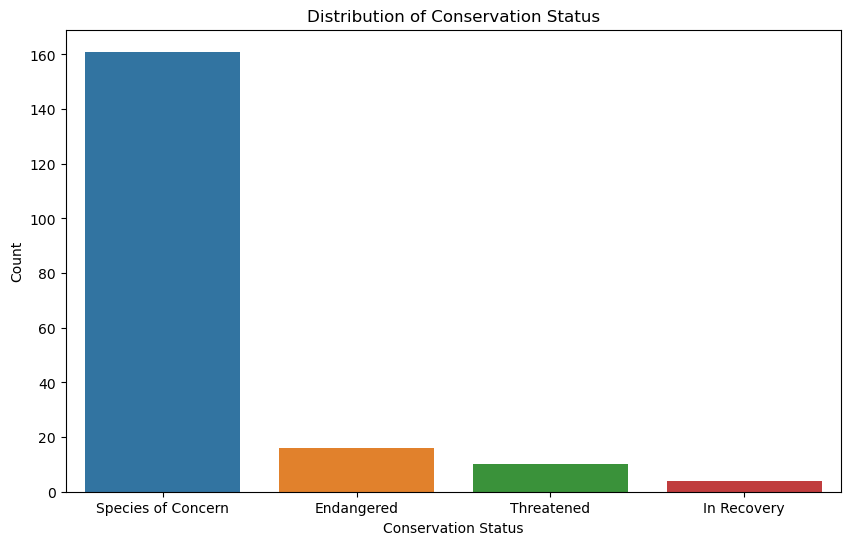

In [27]:
# visualise the distribution of conversation status

plt.figure(figsize=(10,6))
sns.countplot(data=species_info, x='conservation_status')
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

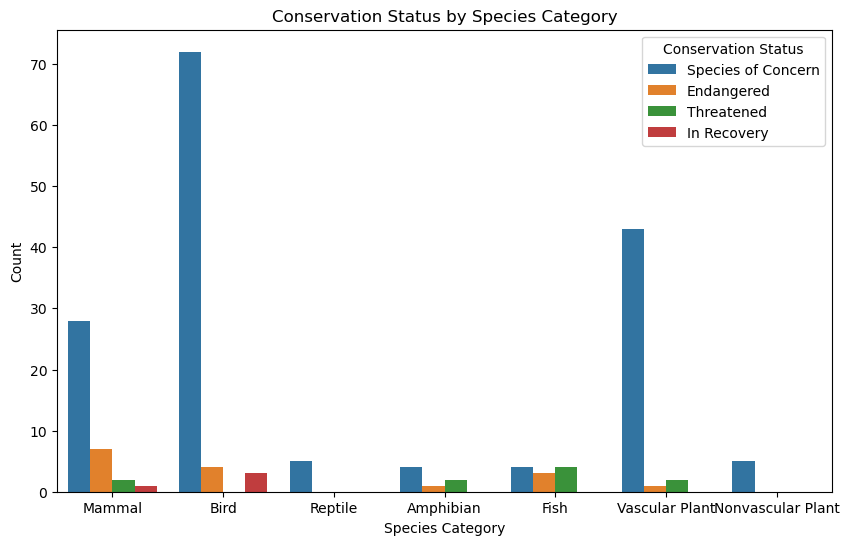

In [28]:
#analyse the relationship between conservation status and species category

plt.figure(figsize=(10, 6))
sns.countplot(data=species_info, x='category', hue='conservation_status')
plt.title('Conservation Status by Species Category')
plt.xlabel('Species Category')
plt.ylabel('Count')
plt.legend(title='Conservation Status', loc='upper right')
plt.show

In [32]:
# Identify which species were spotted the most at each park
most_spotted_species = observations.groupby(
    ['park_name', 'scientific_name']).agg({'observations': 'sum'}).reset_index()
most_spotted_species = most_spotted_species.sort_values(by='observations', ascending=False)
print("\nMost Spotted Species at Each Park:")
print(most_spotted_species.head())


Most Spotted Species at Each Park:
                       park_name        scientific_name  observations
13534  Yellowstone National Park         Holcus lanatus           805
16075  Yellowstone National Park  Streptopelia decaocto           771
15261  Yellowstone National Park          Puma concolor           753
15191  Yellowstone National Park          Procyon lotor           745
13637  Yellowstone National Park   Hypochaeris radicata           726


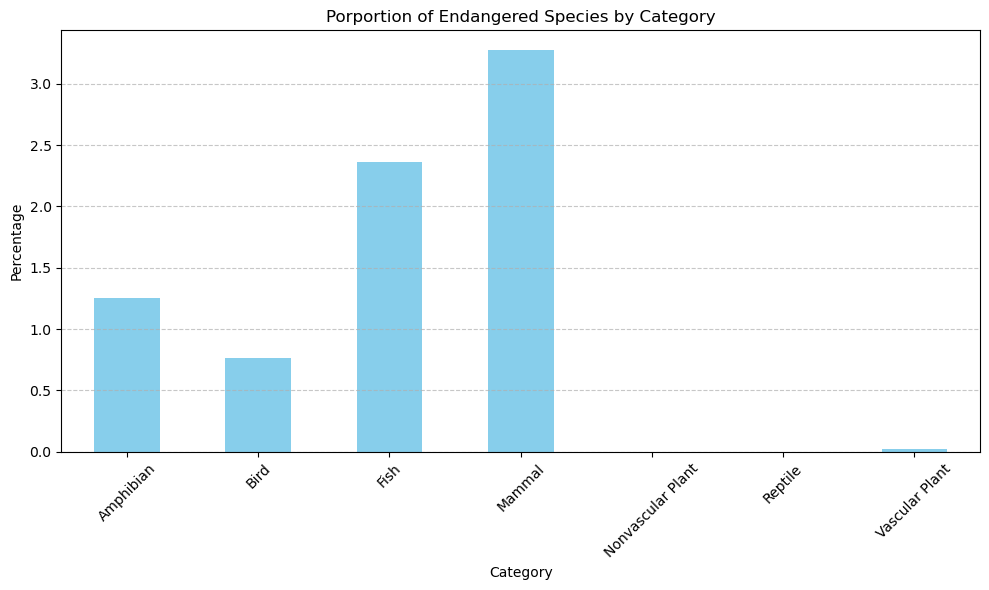

In [33]:
# To identify the types of species that are more likely to be endangered: 
# step 1- Group the data by category and calculate the percentage of endangered species

endangered_by_category = species_info.groupby("category")["conservation_status"] \
.apply(lambda x: (x == "Endangered").sum() / len(x) * 100)

# step 2- Plot the proportions of endangered species by category
plt.figure(figsize=(10, 6))
endangered_by_category.plot(kind="bar", color="skyblue")
plt.title("Porportion of Endangered Species by Category")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



In [38]:
# Key Findings: 
#1. Some categories of species such as Mammals and Fish have a higher propotion of endangered species. 
#2. The above patterns can help prioritise allocation of resources to protect vulnerable species.

#In conclusions:
#This project provided valuable insight into the conservation status of species in National Parks by emphasisng the importance of data-driven approaches which can be used to contribute to the preservation and promotion of sustainable management.


